## Regression
Regression Analysis is a form of prediction modeling technique that
investigate the relationship dependant variable and independant 
variable.

There are many types of regression -

- Linear Regression

When there is a single independant variable (x), the method is referred to as 
simple linear regression. When there are multiple independant variables, the method as 
multiple linear regression.

Linear regression is a linear model, e.g. a model that assumes a linear relationship
between the input variables (x) and the single output variable (y)

- Logistic Regression

logistic regression we can solve classification problems where we are trying
to predict discrete values.

- Polyonomial regression

In [1]:
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv('sample_data/student_scores.csv')
df_tips = sns.load_dataset('tips')

In [38]:
df_tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
61,13.81,2.00,Male,Yes,Sat,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2
182,45.35,3.50,Male,Yes,Sun,Dinner,3
229,22.12,2.88,Female,Yes,Sat,Dinner,2
228,13.28,2.72,Male,No,Sat,Dinner,2


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


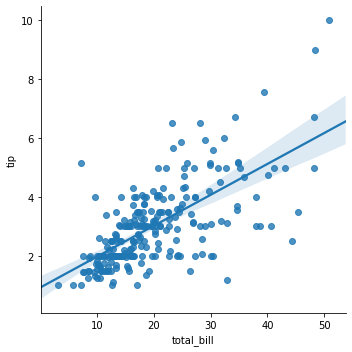

In [32]:
# sns.lmplot(x='Hours', y='Scores', data=dataset, fit_reg=True)
# plt.title('Hours vs Percentage')
# plt.xlabel('Hours Studied')
# plt.ylabel('Percentage Score')

sns.lmplot(x="total_bill", y='tip', data=df_tips)

In [50]:
from sklearn.model_selection import train_test_split
# x = dataset.iloc[:, :-1] ## independant -> dataframe 
# y = dataset['Scores']  ## dependant -> array/series

x= df_tips.iloc[:,0:1] ## total_bill -> df_tips[['total_bill']]


y= df_tips['tip'] ## tip

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [51]:
regressor = LinearRegression()

In [52]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
regressor.intercept_  ##c

1.0285439454607277

In [62]:
regressor.coef_  ## the slope -> m

array([0.0968534])

In [53]:
y_pred = regressor.predict(x_test)

In [55]:

df = pd.DataFrame({'Actual tip': y_test, 'Predicted tip': y_pred})
df_n = pd.concat([x_test,df], axis=1, sort=False)
df_n

,total_bill,Actual tip,Predicted tip
64,17.59,2.64,2.732195
63,18.29,3.76,2.799993
55,19.49,3.51,2.916217
111,7.25,1.00,1.730731
225,16.27,2.50,2.604349
92,5.75,1.00,1.585451
76,17.92,3.08,2.764157
181,23.33,5.65,3.288134
188,18.15,3.50,2.786433
180,34.65,3.68,4.384514


In [56]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6564074900962108
Mean Squared Error: 0.821309064276629
Root Mean Squared Error: 0.9062610353957787


In [57]:
r2_score(y_test,y_pred)

0.5906895098589039

In [59]:
df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [4]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

def variance(values):
    m = mean(values)
    return sum([(x-m)**2 for x in values])

def std(values):
    var = variance(values)
    return var**0.5